In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings("ignore")


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
df = pd.read_csv("Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
print(df.isnull().sum())

clean_text    4
category      7
dtype: int64


In [7]:
df.dropna(inplace=True)

In [8]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text'])

y = df['category']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [11]:
y_pred = model.predict(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7470086518991226

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.92      0.42      0.57      7102
         0.0       0.87      0.69      0.77     11042
         1.0       0.67      0.95      0.78     14450

    accuracy                           0.75     32594
   macro avg       0.82      0.69      0.71     32594
weighted avg       0.79      0.75      0.73     32594



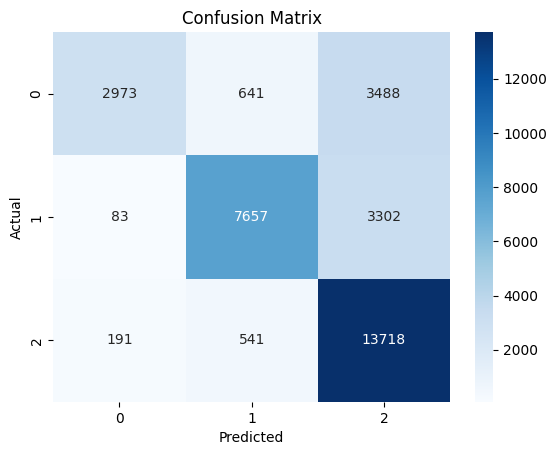

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
def predict_sentiment(text):
    text_vec = vectorizer.transform([text])
    return model.predict(text_vec)[0]

In [15]:
sample_text = "I think Modi's leadership is very inspiring."
print("Predicted Sentiment:", predict_sentiment(sample_text))

Predicted Sentiment: 1.0


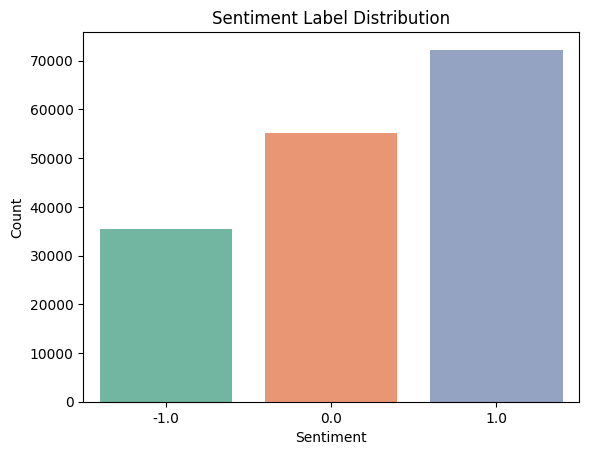

In [16]:
import seaborn as sns
sns.countplot(x='category', data=df, palette='Set2')
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [21]:
df = pd.read_csv("user_reviews.csv")  


In [22]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [23]:
df = df[['Translated_Review', 'Sentiment']].dropna()

In [24]:
print(df['Sentiment'].value_counts())

Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64


In [25]:
stemmer = PorterStemmer()

In [26]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [28]:
stop_words = set(stopwords.words('english'))

In [29]:
df['clean_text'] = df['Translated_Review'].apply(clean_text)

In [30]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['Sentiment']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [33]:
y_pred = model.predict(X_test)

In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7403152551429335

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.44      0.59      1654
     Neutral       0.77      0.09      0.17      1032
    Positive       0.72      0.98      0.83      4800

    accuracy                           0.74      7486
   macro avg       0.79      0.51      0.53      7486
weighted avg       0.76      0.74      0.69      7486



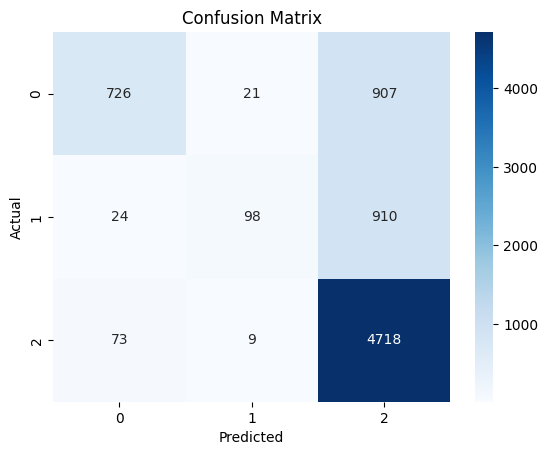

In [35]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [36]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    return model.predict(vec)[0]

In [ ]:
print(predict_sentiment("The app is terrible."))

Negative
